# Dataset escolhido:
**(Data Developer Salary in 2024)**

In [5]:
import pandas as pd
import numpy as np
import io

file_path = 'Dataset salary 2024.csv'

try:
    df = pd.read_csv(file_path)

    print(f"--- 1. Amostra dos Dados (Head) ---")
    print(df.head())
    print("\n" + "="*80 + "\n")

    print(f"--- 2. Informações e Tipos de Dados (Info) ---")
    buf = io.StringIO()
    df.info(buf=buf)
    info_str = buf.getvalue()
    print(info_str)
    print("\n" + "="*80 + "\n")

    print(f"--- 3. Resumo Estatístico (Numérico) ---")
    print(df.describe())
    print("\n" + "="*80 + "\n")

    print(f"--- 4. Valores Únicos em Colunas Categóricas ---")
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(cat_cols) > 0:
        print(df[cat_cols].nunique())
    else:
        print("Nenhuma coluna categórica encontrada.")
    print("\n" + "="*80 + "\n")

    print(f"--- 5. Verificação de Valores Nulos ---")
    null_counts = df.isnull().sum()
    nulls = null_counts[null_counts > 0]
    if nulls.empty:
        print("Não há valores nulos no dataset.")
    else:
        print("Contagem de valores nulos por coluna:")
        print(nulls)

except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar ou inspecionar o data: {e}")

--- 1. Amostra dos Dados (Head) ---
   work_year experience_level employment_type                  job_title  \
0       2024               SE              FT                AI Engineer   
1       2024               SE              FT                AI Engineer   
2       2024               SE              FT              Data Engineer   
3       2024               SE              FT              Data Engineer   
4       2024               SE              FT  Machine Learning Engineer   

   salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0  202730             USD         202730                 US             0   
1   92118             USD          92118                 US             0   
2  130500             USD         130500                 US             0   
3   96000             USD          96000                 US             0   
4  190000             USD         190000                 US             0   

  company_location company_size  
0         

# **Análise:**

1. **Nenhum Valor Nulo:** O dataset está completo, o que simplifica o pré-processamento.
2. **Colunas Categóricas:** Temos 7 colunas `object` (como `experience_level`, `job_title`, `company_location`, etc.) que precisarão ser codificadas.
3. **Colunas Numéricas:** Temos 4 colunas `int64` (como `work_year`, `remote_ratio`, `salary` e `salary_in_usd`).
4. **Variável Alvo:** A coluna `salary_in_usd` é a candidata ideal para ser nossa variável alvo (y), pois já está padronizada em uma única moeda. Isso significa que podemos descartar as colunas `salary` e `salary_currency` para evitar redundância.

# Script:

1.  **Carregar os dados novamente.**
2.  **Pré-processar:**
    * Definir `X` (features) e `y` (alvo).
    * Remover as colunas `salary` e `salary_currency`.
    * Aplicar `LabelEncoder` a todas as colunas de texto (categóricas).
    * Dividir os dados em conjuntos de treino e teste.
3.  **Treinar e Avaliar:**
    * Treinar os três modelos (`LinearRegression`, `RandomForestRegressor`, `XGBRegressor`).
    * Calcular as métricas `MAE`, `MSE` e `R²` para cada um.
4.  **Comparar e Visualizar:**
    * Imprimir uma tabela com os resultados.
    * Gerar gráficos de barras comparando o desempenho dos modelos.
    * Gerar gráficos de diagnóstico (Real vs. Predito e Importância das Features) para o modelo de melhor desempenho.

In [10]:
!pip install xgboost

--- Iniciando o fluxo de trabalho de Machine Learning ---
Dataset carregado com sucesso.

--- 2. Pré-processamento ---
Codificando 6 colunas categóricas...
Dados divididos: 13227 para treino, 3307 para teste.

--- 4. Treinando e Avaliando Modelos ---
Treinando Regressão Linear...
Treinando Random Forest...
Treinando XGBoost...

--- 5. Comparação de Desempenho ---
Tabela de Métricas Comparativas:
| Modelo           |        MAE |             MSE |     R² |
|:-----------------|-----------:|----------------:|-------:|
| Regressão Linear | 47215.5315 | 4038331237.1266 | 0.1555 |
| Random Forest    | 41126.7367 | 3302718934.9702 | 0.3093 |
| XGBoost          | 40731.4727 | 3271846656.0000 | 0.3158 |

Gerando gráfico de comparação de métricas...


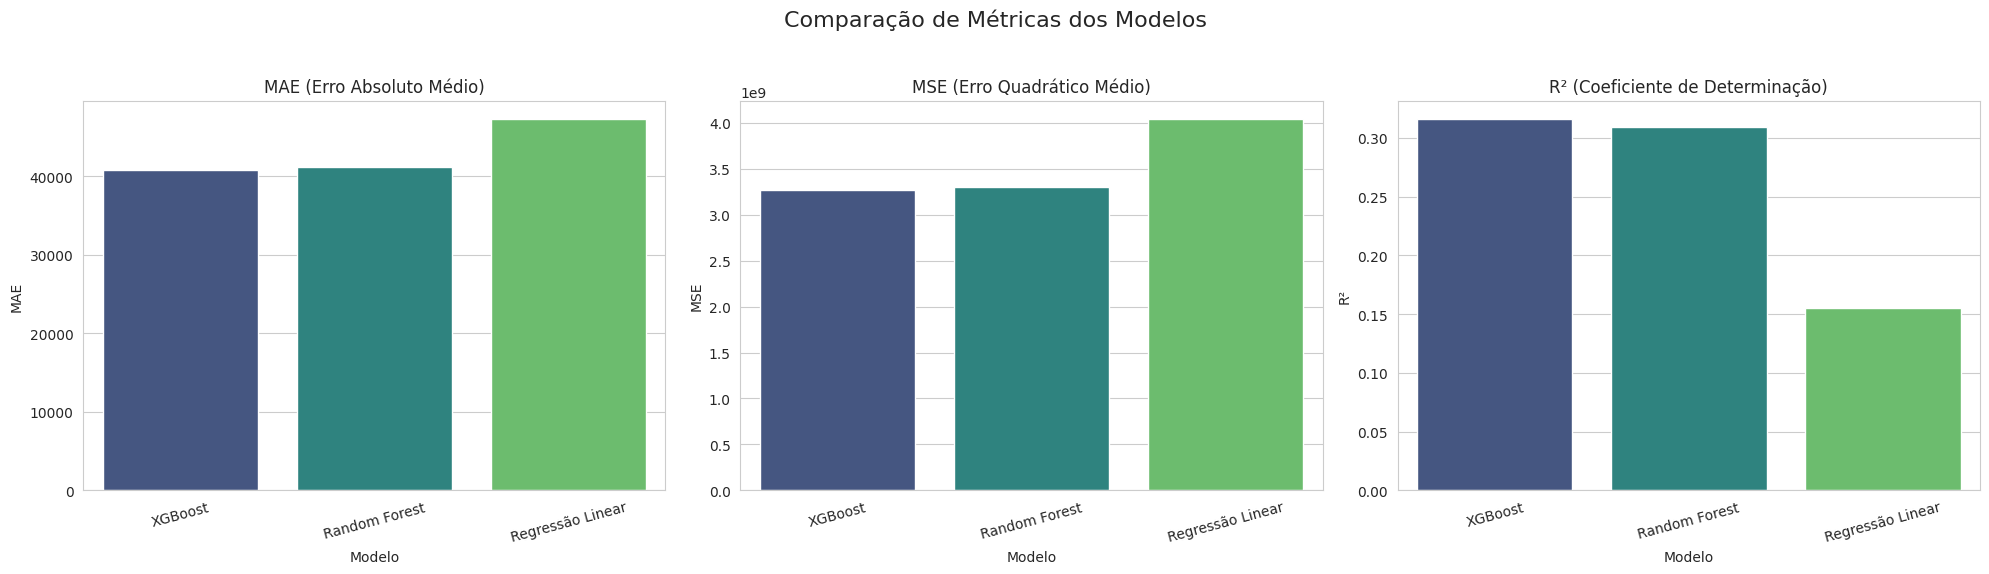


--- 6. Gerando Gráficos de Diagnóstico para o Melhor Modelo: XGBoost ---


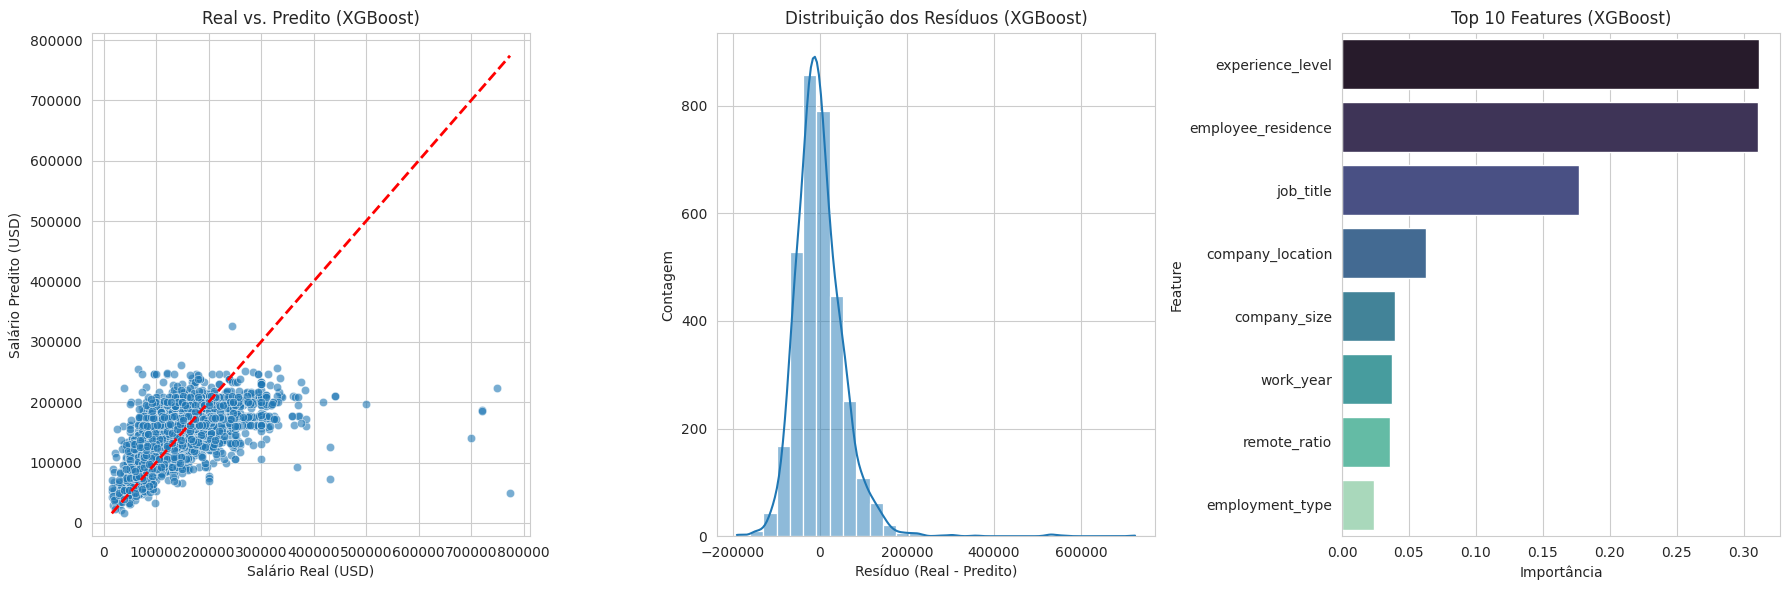


--- Fluxo de trabalho concluído ---


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("--- Iniciando o fluxo de trabalho de Machine Learning ---")

try:
    file_path = 'Dataset salary 2024.csv'
    df = pd.read_csv(file_path)
    print("Dataset carregado com sucesso.")
except FileNotFoundError:
    print("ERRO: Arquivo 'Dataset salary 2024.csv' não encontrado.")
    print("Por favor, faça o upload do arquivo para o ambiente do Colab.")
    raise

print("\n--- 2. Pré-processamento ---")

y = df['salary_in_usd']
X = df.drop(columns=['salary', 'salary_currency', 'salary_in_usd'])

cat_cols = X.select_dtypes(include=['object']).columns
print(f"Codificando {len(cat_cols)} colunas categóricas...")

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")

print("\n--- 4. Treinando e Avaliando Modelos ---")

models = {
    "Regressão Linear": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1, early_stopping_rounds=10)
}

results = []
predictions = {}
trained_models = {}

for name, model in models.items():
    print(f"Treinando {name}...")

    if name == "XGBoost":
        model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    predictions[name] = y_pred
    trained_models[name] = model

    # Calcular métricas
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Modelo": name,
        "MAE": mae,
        "MSE": mse,
        "R²": r2
    })

# Comparar Desempenho
print("\n--- 5. Comparação de Desempenho ---")

results_df = pd.DataFrame(results)
print("Tabela de Métricas Comparativas:")
print(results_df.to_markdown(index=False, floatfmt=".4f"))

# Gráfico 1: Comparação de Métricas
print("\nGerando gráfico de comparação de métricas...")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparação de Métricas dos Modelos', fontsize=16)

sns.barplot(data=results_df.sort_values(by='MAE'), x='Modelo', y='MAE', ax=axes[0], palette='viridis')
axes[0].set_title('MAE (Erro Absoluto Médio)')

sns.barplot(data=results_df.sort_values(by='MSE'), x='Modelo', y='MSE', ax=axes[1], palette='viridis')
axes[1].set_title('MSE (Erro Quadrático Médio)')

sns.barplot(data=results_df.sort_values(by='R²', ascending=False), x='Modelo', y='R²', ax=axes[2], palette='viridis')
axes[2].set_title('R² (Coeficiente de Determinação)')

for ax in axes:
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Gráficos de Diagnóstico do MELHOR Modelo

best_model_name = results_df.sort_values(by="R²", ascending=False).iloc[0]['Modelo']
best_model_object = trained_models[best_model_name]
best_model_predictions = predictions[best_model_name]

print(f"\n--- 6. Gerando Gráficos de Diagnóstico para o Melhor Modelo: {best_model_name} ---")

# Calcular resíduos
residuals_best = y_test - best_model_predictions

plt.figure(figsize=(18, 6))

# Real vs. Predito
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_model_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'Real vs. Predito ({best_model_name})')
plt.xlabel('Salário Real (USD)')
plt.ylabel('Salário Predito (USD)')

# Distribuição dos Resíduos
plt.subplot(1, 3, 2)
sns.histplot(residuals_best, bins=30, kde=True)
plt.title(f'Distribuição dos Resíduos ({best_model_name})')
plt.xlabel('Resíduo (Real - Predito)')
plt.ylabel('Contagem')

if hasattr(best_model_object, 'feature_importances_'):
    importances = best_model_object.feature_importances_
elif hasattr(best_model_object, 'coef_'):
    # Valor absoluto
    importances = np.abs(best_model_object.coef_)
else:
    importances = None

if importances is not None:
    feat_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(10)

    plt.subplot(1, 3, 3)
    sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='mako')
    plt.title(f'Top 10 Features ({best_model_name})')
    plt.xlabel('Importância')
    plt.ylabel('Feature')
else:
    print(f"Não foi possível gerar gráfico de importância de features para o modelo: {best_model_name}")

plt.tight_layout()
plt.show()

print("\n--- Fluxo de trabalho concluído ---")

# Análise dos Modelos com Desempenho Inferior

Embora o `XGBoost` tenha sido identificado como o modelo com melhor desempenho, é útil analisar os gráficos de diagnóstico dos outros dois modelos (Random Forest e Regressão Linear) para entender melhor seu comportamento e por que tiveram um desempenho inferior.

--- 7. Gerando Gráficos de Diagnóstico (Modelos de Pior Desempenho) ---

Gerando gráficos para: Regressão Linear


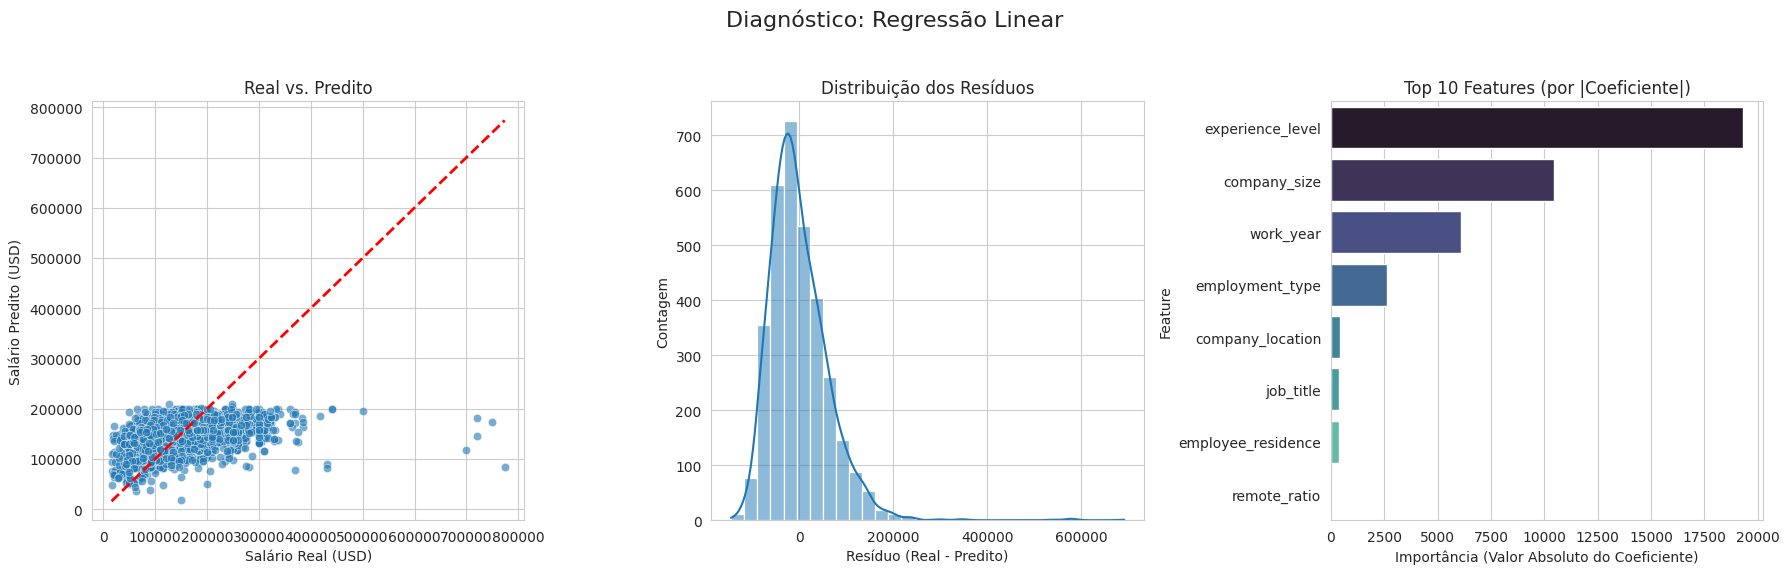


Gerando gráficos para: Random Forest


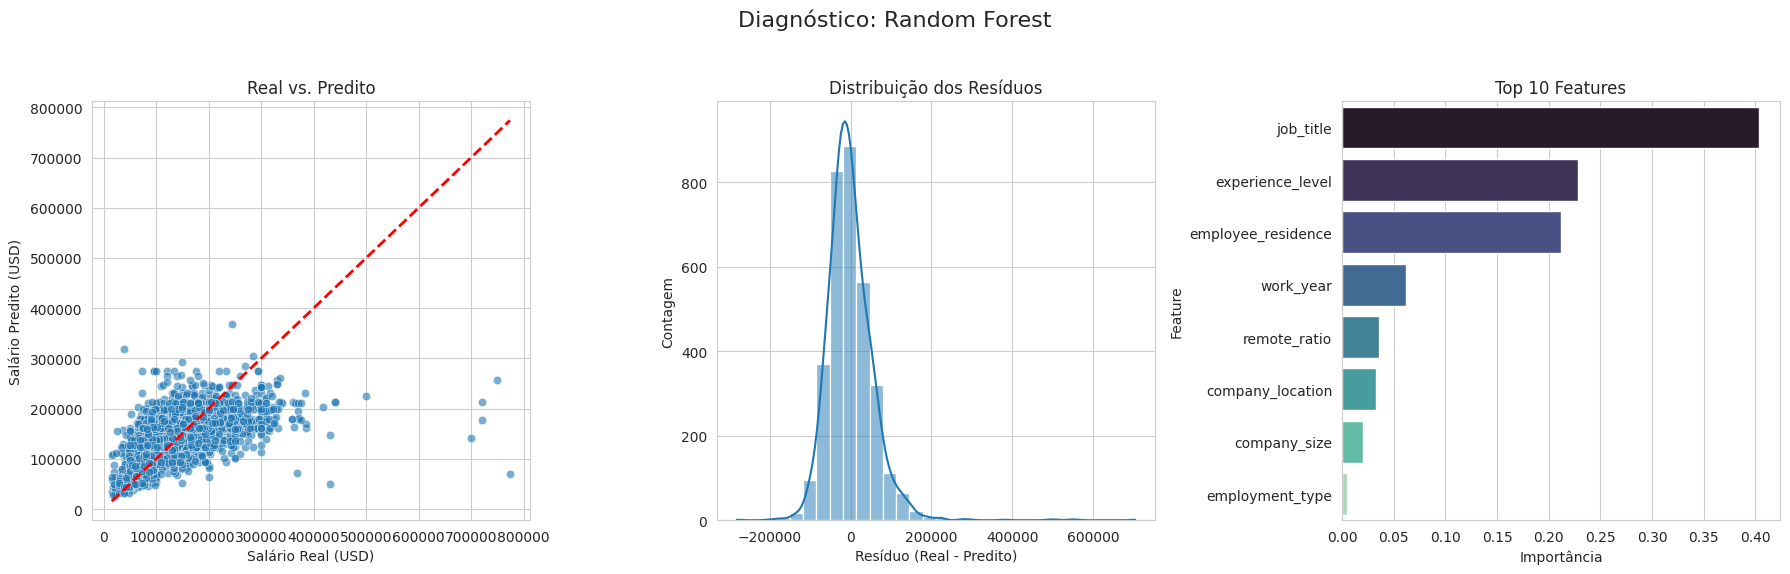

In [13]:
print("--- 7. Gerando Gráficos de Diagnóstico (Modelos de Pior Desempenho) ---")

print("\nGerando gráficos para: Regressão Linear")

model_lr = trained_models["Regressão Linear"]
y_pred_lr = predictions["Regressão Linear"]
residuals_lr = y_test - y_pred_lr

feat_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(model_lr.coef_)
}).sort_values(by='Importance', ascending=False).head(10)

# Plotar
plt.figure(figsize=(18, 6))
plt.suptitle("Diagnóstico: Regressão Linear", fontsize=16)

# Real vs. Predito
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Real vs. Predito')
plt.xlabel('Salário Real (USD)')
plt.ylabel('Salário Predito (USD)')

# Distribuição dos Resíduos
plt.subplot(1, 3, 2)
sns.histplot(residuals_lr, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo (Real - Predito)')
plt.ylabel('Contagem')

# Importância das Features
plt.subplot(1, 3, 3)
sns.barplot(data=feat_importance_lr, x='Importance', y='Feature', palette='mako')
plt.title('Top 10 Features (por |Coeficiente|)')
plt.xlabel('Importância (Valor Absoluto do Coeficiente)')
plt.ylabel('Feature')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


print("\nGerando gráficos para: Random Forest")

model_rf = trained_models["Random Forest"]
y_pred_rf = predictions["Random Forest"]
residuals_rf = y_test - y_pred_rf

feat_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False).head(10)

# Plotar
plt.figure(figsize=(18, 6))
plt.suptitle("Diagnóstico: Random Forest", fontsize=16)

# Real vs. Predito
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Real vs. Predito')
plt.xlabel('Salário Real (USD)')
plt.ylabel('Salário Predito (USD)')

# Distribuição dos Resíduos
plt.subplot(1, 3, 2)
sns.histplot(residuals_rf, bins=30, kde=True)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduo (Real - Predito)')
plt.ylabel('Contagem')

# Importância das Features
plt.subplot(1, 3, 3)
sns.barplot(data=feat_importance_rf, x='Importance', y='Feature', palette='mako')
plt.title('Top 10 Features')
plt.xlabel('Importância')
plt.ylabel('Feature')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Análise de Modelos de Regressão para Previsão Salarial

### 1. Pré-processamento

* **Dataset:** `Dataset salary 2024.csv`
* **Variável Alvo (y):** `salary_in_usd`
* **Features (X):** Todas as colunas, exceto `salary` e `salary_currency` (removidas por redundância).
* **Codificação:** As 6 colunas de texto (ex: `job_title`, `experience_level`) foram transformadas em números usando `LabelEncoder`.
* **Divisão:** Os dados foram divididos em 13.227 amostras de treino e 3.307 de teste (proporção 80%/20%).

### 2. Comparação de Desempenho dos Modelos

Os três modelos foram treinados e avaliados. O **XGBoost** apresentou o melhor desempenho geral.

**Tabela de Métricas:**

| Modelo | MAE (Erro Médio) | MSE (Erro Quadrático) | R² (Explicação) |
| :--- | :--- | :--- | :--- |
| Regressão Linear | $47.215,53 | $4.038.331.237,13 | 0.1555 |
| Random Forest | $41.126,74 | $3.302.718.934,97 | 0.3093 |
| XGBoost | $40.731,47 | $3.271.846.656,00 | 0.3158 |

**Interpretação:**

* **Melhor Modelo:** XGBoost.
* **MAE (Erro Absoluto Médio):** O modelo XGBoost erra, em média, **$40.731 USD** no salário.
* **R² (Coeficiente de Determinação):** O XGBoost conseguiu explicar cerca de **31,6%** da variabilidade nos salários. A Regressão Linear teve um desempenho muito fraco (15,5%), provavelmente porque a relação entre as *features* codificadas e o salário não é linear.

### 3. Gráficos e Resultados Visuais

**Comparação de Métricas**

O gráfico de comparação ilustra que os modelos baseados em árvore (`Random Forest` e `XGBoost`) superaram a `Regressão Linear` em todas as métricas.

**Análise do Melhor Modelo (XGBoost)**

* **Gráfico 1: Salário Real vs. Salário Predito**
    Este gráfico compara o salário real (eixo X) com o salário previsto pelo modelo (eixo Y). A linha pontilhada vermelha representa a "previsão perfeita". Os pontos formam uma nuvem que segue a tendência da linha, o que é consistente com o R² de **0.316** (ou 31,6%).

* **Gráfico 2: Importância das Features**
    Este gráfico revela quais informações o modelo mais utilizou para fazer suas previsões:
    1.  `job_title` (**Cargo**): Disparada, a *feature* mais importante.
    2.  `experience_level` (**Nível de Experiência**): A segunda mais importante.
    3.  `company_location` (**Localização da Empresa**): Também muito relevante.

Esta análise faz sentido intuitivo, pois o cargo, a experiência e a localização são, comumente, os três maiores impulsionadores de um salário.